In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
with open('docs/tsne.json', 'r') as f:
    aaa = json.load(f)

In [5]:
aaa_x = [aaa[x]['x'] for x in aaa.keys()]
aaa_y = [aaa[x]['y'] for x in aaa.keys()]

In [14]:
def rand_jitter(arr):
    stdev = .004 * (max(arr) - min(arr))
    return np.round(arr + np.random.randn(len(arr)) * stdev, 2)

aaa_x_j = rand_jitter(aaa_x)
aaa_y_j = rand_jitter(aaa_y)

aaa_j = {}
for i, k in enumerate(aaa.keys()):
    aaa_j[k] = {"x": aaa_x_j[i], "y": aaa_y_j[i]}

In [15]:
with open("docs/tsne_jitter.json", "w") as f:
    json.dump(aaa_j, f)

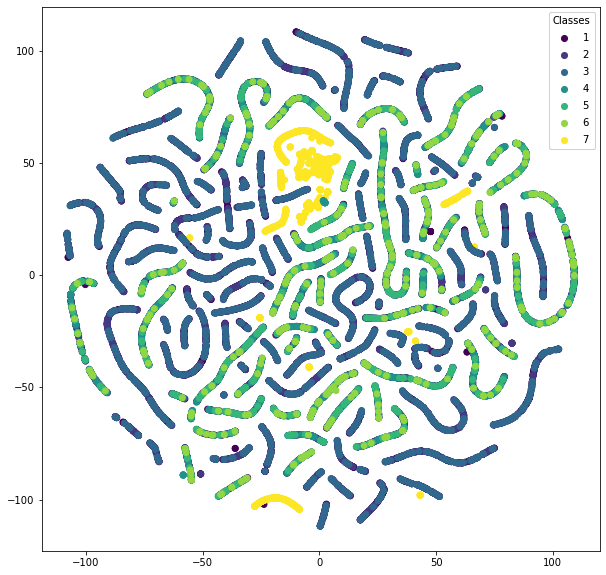

In [46]:
per_visit = pd.read_csv('per_visit.csv')

per_visit['stay_duration_normalized'] = per_visit.stay_duration / np.max(per_visit.stay_duration) * 10

tsne_dt = per_visit[['stops', 'num_generalgate', 'num_rangerstop',
       'num_camping', 'num_gate', 'stay_duration_normalized']]

tsne_results = TSNE(perplexity = 20).fit_transform(tsne_dt)

color_value = np.array((per_visit['car-type']))
color_value[color_value == '2P'] = '7'
color_value = np.array(color_value, dtype = int)

sns.relplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=per_visit['car-type'],
            alpha=.5)

# plt.rcParams['figure.figsize'] = [10, 10]
# fig, ax = plt.subplots(1)

# scatter = ax.scatter(tsne_results[:, 0], tsne_results[:, 1], c = color_value)

# legend1 = ax.legend(*scatter.legend_elements(),
#                     loc="upper right", title="Classes")
# ax.add_artist(legend1)
# ax.title.set_text('TSNE Perplexity = ' + str(tsne_perplexities[i]))

In [37]:
per_car = pd.read_csv('per_car.csv')
per_car

,car-type,car-id,total_visit,total_stay_duration,total_stops,total_num_generalgate,total_num_rangerstop,total_num_camping,total_num_rangerbase,total_num_gate
0,1,20150001050042-811,1,96.884722,6,2,0,2,0,0
1,1,20150001070000-174,1,0.925556,8,4,2,0,0,0
2,1,20150001070006-104,1,133.900833,11,5,2,2,0,0
3,1,20150001080044-124,1,216.589722,7,3,0,2,0,0
4,1,20150001090048-374,1,104.985833,9,3,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...
18703,6,20165620105658-44,1,0.840278,6,2,2,0,0,0
18704,6,20165706055731-995,1,0.851389,7,3,2,0,0,0
18705,6,20165717125740-295,1,1.143056,8,4,2,0,0,0
18706,6,20165721085752-855,1,1.059444,8,4,2,0,0,0


In [43]:
per_car = pd.read_csv('per_car.csv')

per_car['total_stay_duration_normalized'] = per_car.total_stay_duration / np.max(per_car.total_stay_duration) * 10

tsne_car_dt = per_car[['total_visit', 'total_stops', 'total_num_generalgate', 'total_num_rangerstop',
       'total_num_camping', 'total_num_gate', 'total_stay_duration_normalized']]

In [ ]:
fig, ax = plt.subplots()
for color in ['tab:blue', 'tab:orange', 'tab:green']:
    n = 750
    x, y = np.random.rand(2, n)
    scale = 200.0 * np.random.rand(n)
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

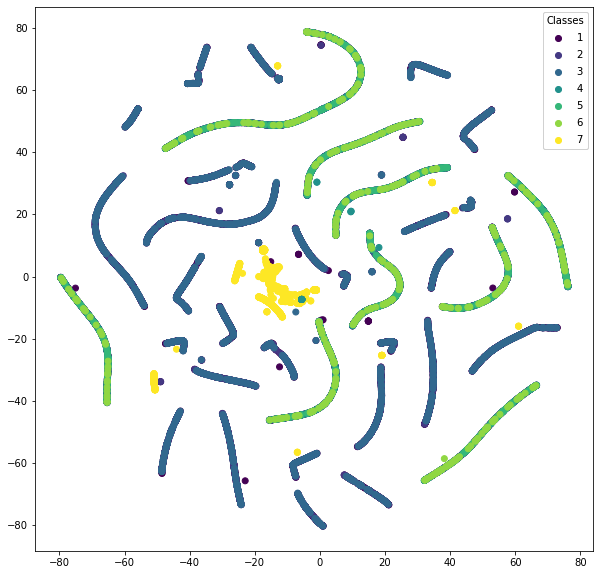

In [101]:
tsne_car_results = TSNE(perplexity = 80).fit_transform(tsne_car_dt)

car_color_value = np.array((per_car['car-type']))
car_color_value[car_color_value == '2P'] = '7'
car_color_value = np.array(car_color_value, dtype = int)

plt.rcParams['figure.figsize'] = [10, 10]
fig, ax = plt.subplots(1)

scatter = ax.scatter(tsne_car_results[:, 0], tsne_car_results[:, 1], c = car_color_value)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)
# ax.title.set_text('TSNE Perplexity = ' + str(tsne_perplexities[i]))

In [107]:
tsne_dt = pd.DataFrame({'x': tsne_car_results[:, 0], 'y': tsne_car_results[:, 1]}, index = per_car['car-id'])

In [112]:
tsne_dt.to_json('tsne.json', orient='index')

In [88]:
import matplotlib

In [92]:
cm = matplotlib.colors.Colormap('viridis', 7)

In [93]:
matplotlib.colors

False

<AxesSubplot:>

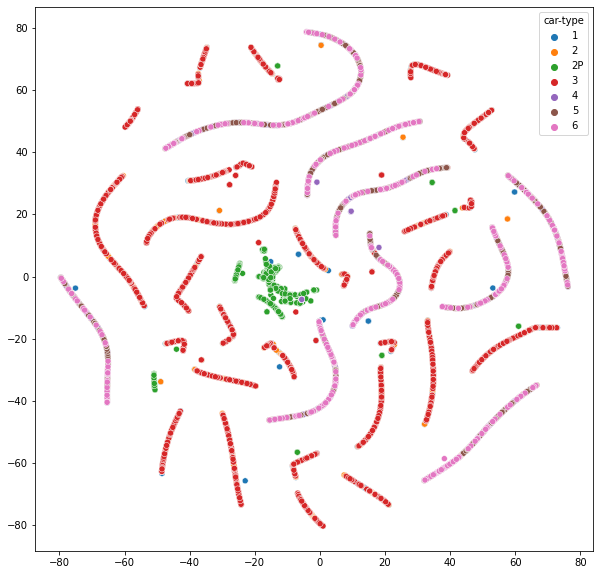

In [114]:
sns.scatterplot(x=tsne_car_results[:, 0], y=tsne_car_results[:, 1], hue=per_car['car-type'],
                alpha=1)